In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [3]:
data = pd.read_excel(r"C:\Users\adity\Downloads\Price Prediction\PROJECT2 - Copy\BANANA.xlsx",parse_dates = True)
data

,YEAR,PRICE
0,2004,NaN
1,2005,NaN
2,2006,NaN
3,2007,NaN
4,2008,NaN
5,2009,NaN
6,2010,12586.32
7,2011,25601.48
8,2012,33306.22
9,2013,35450.26


In [4]:
# We now convert this data into a time series data. Currently the date values are stored as string type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    16 non-null     int64  
 1   PRICE   10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 384.0 bytes


In [5]:
data.isnull().any()

YEAR     False
PRICE     True
dtype: bool

In [6]:
data.columns

Index(['YEAR', 'PRICE'], dtype='object')

In [7]:
data = data.fillna(data.mean())

In [8]:
data.head()

,YEAR,PRICE
0,2004,39713.569
1,2005,39713.569
2,2006,39713.569
3,2007,39713.569
4,2008,39713.569


In [9]:
data.describe()

,YEAR,PRICE
count,16.000000,16.000000
mean,2011.500000,39713.569000
std,4.760952,16884.367302
min,2004.000000,12586.320000
25%,2007.750000,34914.250000
50%,2011.500000,39713.569000
75%,2015.250000,41021.056750
max,2019.000000,85624.360000


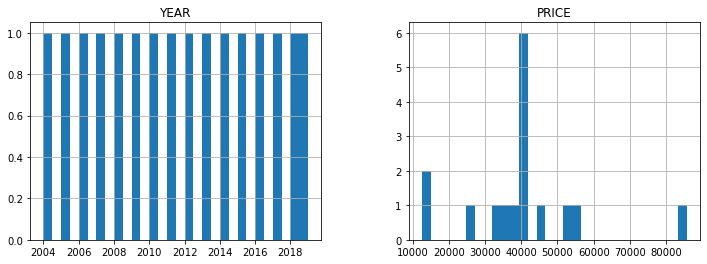

In [10]:
data.hist(bins = 30 , figsize=(12,4))
plt.show()

<AxesSubplot:>

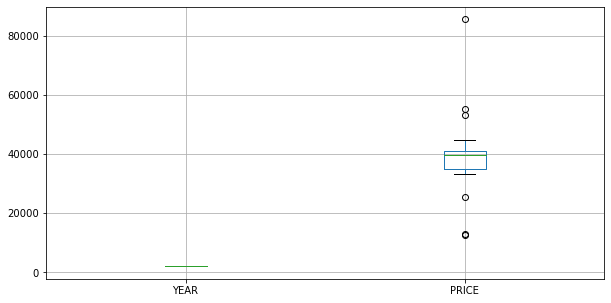

In [11]:
data.boxplot(figsize=(10,5))

<AxesSubplot:xlabel='YEAR', ylabel='PRICE'>

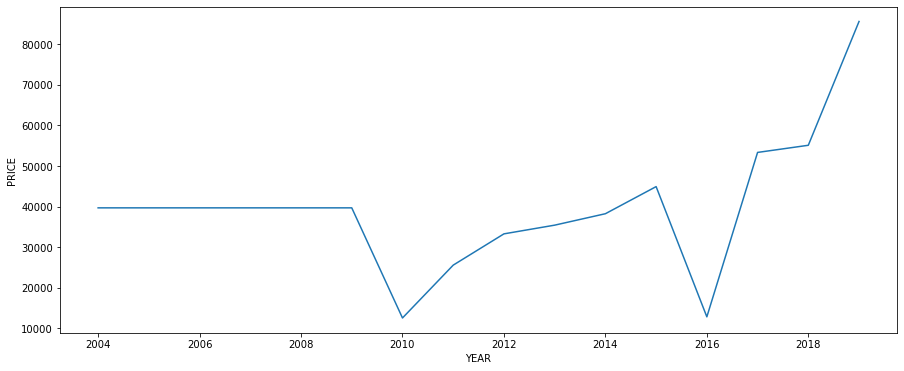

In [12]:
sns.lineplot(data = data , x = 'YEAR' , y = 'PRICE')

<AxesSubplot:>

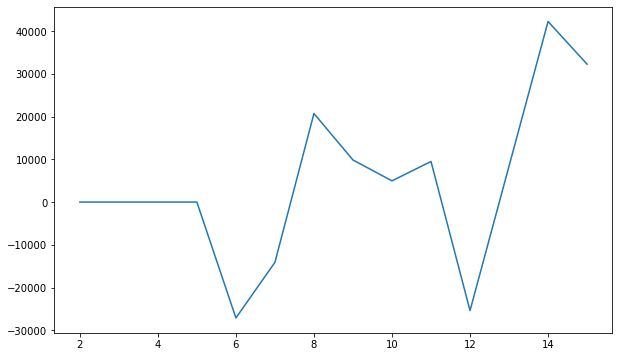

In [13]:
data.PRICE.diff(2).plot(figsize=(10, 6))

In [23]:
!pip install pmdarima

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(data['PRICE'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)  

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=100.042, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=96.633, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=105.497, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=96.155, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=98.633, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=98.633, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=100.633, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=97.837, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=103.978, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=101.288, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 0.602 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   16
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -47.077
Date:                  Thu, 14 Jul 2022   AIC                             96.155
Time:                          10:02:08   BIC                             95.541
Sample:                               0   HQIC                            94.808
                                   - 16                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.684e+08   2.58e+08      1.813      0.070    -3.8e+07    9.75e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.95   Prob(JB):                         0.90
Heteroskedasticity (H):                nan   Skew:                            -0.29
Prob(H) (two-sided):                   nan   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
train = data.iloc[:11]
test = data.iloc[11:]

from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['PRICE'], 
                order = (0, 1, 1), 
                seasonal_order =(0, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               PRICE   No. Observations:                   11
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Thu, 14 Jul 2022   AIC                              4.000
Time:                                     10:21:56   BIC                                nan
Sample:                                          0   HQIC                               nan
                                              - 11                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

<AxesSubplot:>

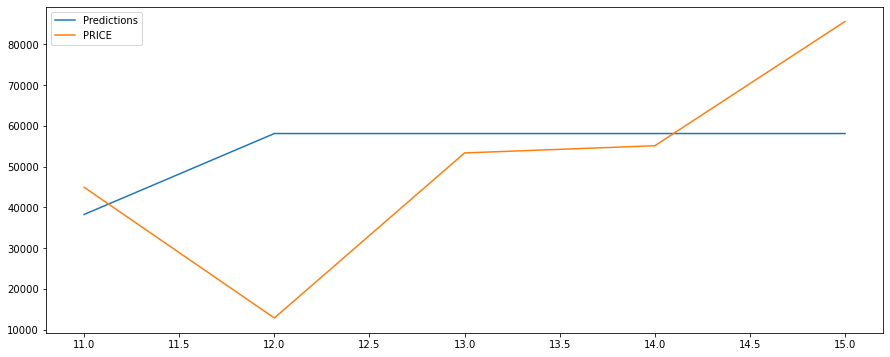

In [42]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['PRICE'].plot(legend = True)
